> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.9 - Visualização de Dados

## Exercícios
Vamos trabalhar com as mesmas bases de dados do exercício de Pandas. Aqui estão os links caso você queira baixar novamente, mas recomendo trabalhar com o `wc_formatado.csv` que exportamos na questão Q2 do exercício anterior.

* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1930_2022.csv
* https://raw.githubusercontent.com/camilalaranjeira/python-intermediario/main/fifa-wc/matches_1991_2023.csv

Para relembrar, essas são as colunas do dataframe:
```
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_1             1312 non-null   string        
 1   time_2             1312 non-null   string        
 2   gols_1             1312 non-null   int64         
 3   gols_2             1312 non-null   int64         
 4   data               1312 non-null   datetime64[ns]
 5   ano                1312 non-null   int64         
 6   país_sede          1312 non-null   string        
 7   comparecimento     1312 non-null   int64         
 8   resultado          1312 non-null   string        
 9   rodada             1312 non-null   category      
 10  gols_1_detalhes    970 non-null    string        
 11  gols_2_detalhes    771 non-null    string        
 12  gols_1_contra      57 non-null     string        
 13  gols_2_contra      30 non-null     string        
 14  gols_1_penalti     170 non-null    string        
 15  gols_2_penalti     119 non-null    string        
 16  cartao_vermelho_1  59 non-null     string        
 17  cartao_vermelho_2  65 non-null     string        
 18  cartao_amarelo_1   834 non-null    string        
 19  cartao_amarelo_2   857 non-null    string        
 20  copa               1312 non-null   string
```

#### Q1.
Realize todos os imports necessários para executar as três bibliotecas de visualização que conhecemos:
* Matplotlib (lembre-se do comando mágico)
* Seaborn
* Plotly

Para cada uma delas, altere o tema padrão de visualização.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

plt.style.use('ggplot')
sns.set_theme(style='darkgrid')

px.defaults.template = 'plotly_dark'

print('OK')

OK


#### Q2.
Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna `comparecimento`.  

Lembre-se que alguns jogos estavam com público 0 incorretamente, que tal remover essas ocorrências para não atrapalhar sua visualzação?

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

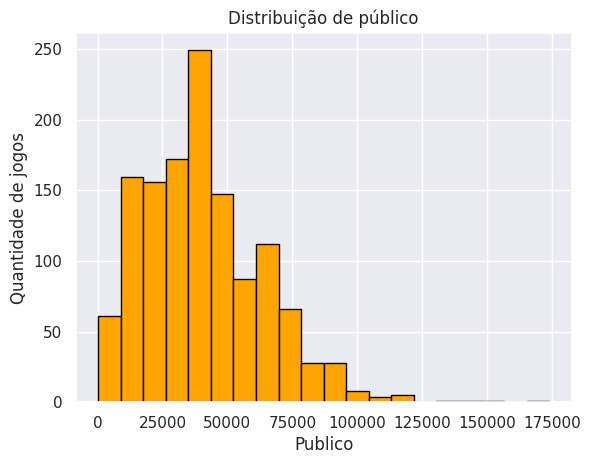

In [3]:
#### Solução com matplotlib
import pandas as pd

wc = pd.read_csv('wc_formatado.csv')

wc_tratado = wc[wc['comparecimento'] > 0]
wc_tratado.head()

plt.hist(wc_tratado['comparecimento'], bins=20, color='orange',edgecolor='black')
plt.title('Distribuição de público')
plt.xlabel('Publico')
plt.ylabel('Quantidade de jogos')
plt.show()


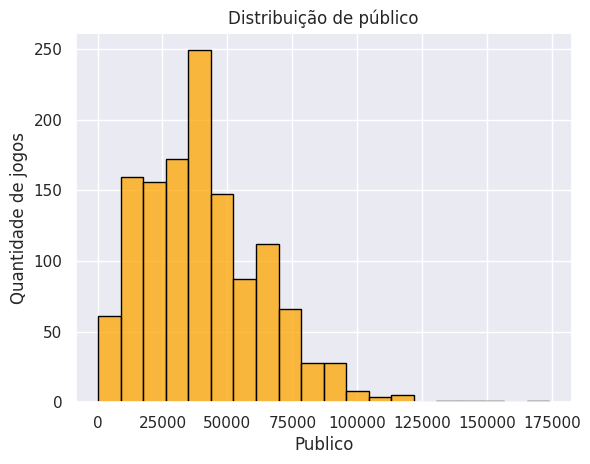

In [3]:
#### solução com seaborn
sns.histplot(wc_tratado['comparecimento'], bins=20, color='orange',edgecolor='black')
plt.title('Distribuição de público')
plt.xlabel('Publico')
plt.ylabel('Quantidade de jogos')
plt.show()

In [14]:
#### solução com plotly
fig = px.histogram(wc_tratado, x='comparecimento', nbins=20, title='Distribuição de público', color_discrete_sequence=['orange'], labels ={'comparecimento' : 'Público presente', 'count': 'Quantidade de jogos'})
fig.update_layout(xaxis_title = 'Publico Presente', yaxis_title ='Quantidade de jogos' )

fig.show()

#### Q3.

Apresente um gráfico de dispersão (scatter) dos atributos `gols_1` e `gols_2`. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir
```python
gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))
```

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos de título e rótulos de dimensão.

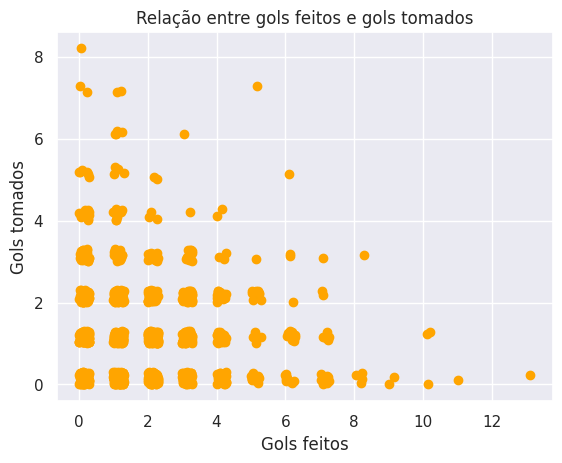

In [16]:
#### solução com matplotlib
import numpy as np

gols = wc[['gols_1', 'gols_2']] + np.random.random(wc[['gols_1', 'gols_2']].shape) * 0.3

plt.scatter(gols['gols_1'], gols['gols_2'], color='orange')
plt.title('Relação entre gols feitos e gols tomados')
plt.xlabel('Gols feitos')
plt.ylabel('Gols tomados')
plt.show()

Text(0, 0.5, 'Gols tomados')

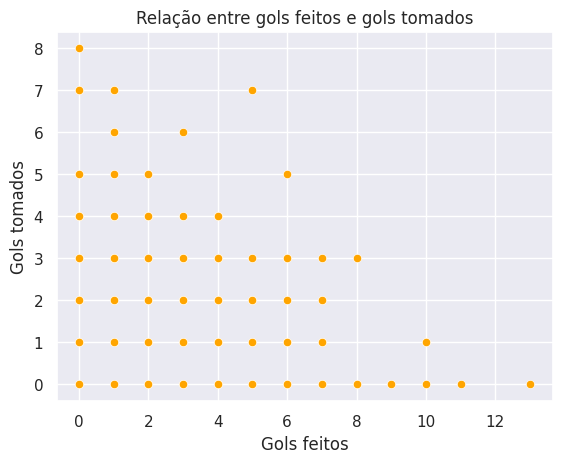

In [17]:
#### solução com seaborn
sns.scatterplot(data=wc, x='gols_1', y='gols_2', color='orange')
plt.title('Relação entre gols feitos e gols tomados')
plt.xlabel('Gols feitos')
plt.ylabel('Gols tomados')

In [19]:
#### solução com plotly
fig = px.scatter(wc, x='gols_1', y='gols_2', color_discrete_sequence=['orange'], title='Relação entre gols feitos e gols tomados', labels = {'gols_1': 'Gols Feitos', 'gols_2': 'Gols Tomados'})
fig.update_layout(xaxis_title = 'Gols Feitos', yaxis_title ='Gols Tomados')
fig.update_traces(marker=dict(size=5, line=dict(width=1, color='white')))
fig.show()

#### Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:
* https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:
* Matplotlib
* Seaborn
* Plotly

Garanta que o gráfico tenha pelo menos os atributos:
* título
* rótulos de dimensão.
* legenda

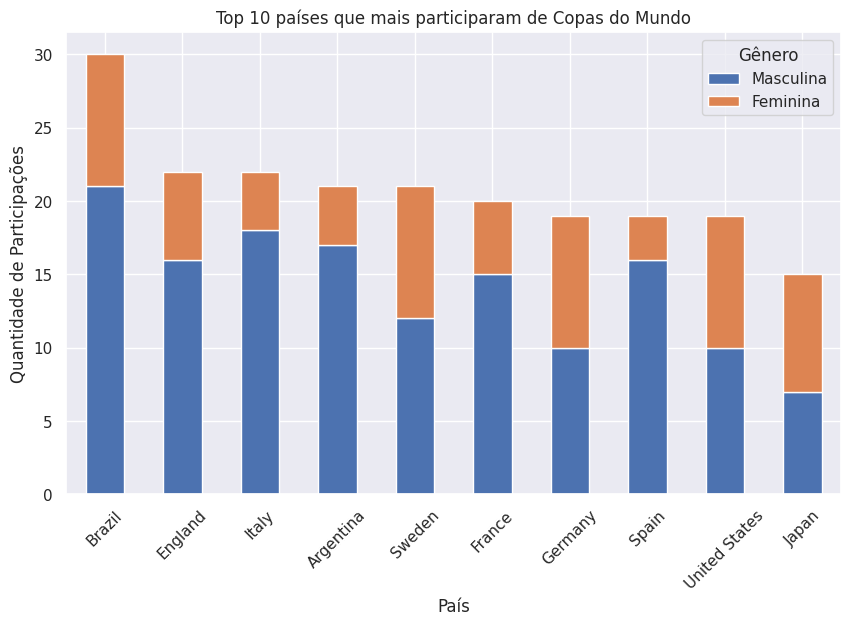

In [59]:
#### solução com matplotlib
participacoes_femininas = wc[wc['copa'] == 'Feminina'].groupby('time_1')['ano'].nunique()
participacoes_masculinas = wc[wc['copa'] == 'Masculina'].groupby('time_1')['ano'].nunique()


participacoes = pd.DataFrame({
    'Feminina': participacoes_femininas,
    'Masculina': participacoes_masculinas
}).fillna(0)


participacoes['Total'] = participacoes['Feminina'] + participacoes['Masculina']


top_10 = participacoes.nlargest(10, 'Total')

# print(top_10)

fig, ax = plt.subplots(figsize=(10, 6))
top_10[['Masculina', 'Feminina']].plot(kind='bar', stacked=True, ax=ax)

ax.set_title('Top 10 países que mais participaram de Copas do Mundo')
ax.set_xlabel('País')
ax.set_ylabel('Quantidade de Participações')
ax.legend(title='Gênero')
plt.xticks(rotation=45)
plt.show()




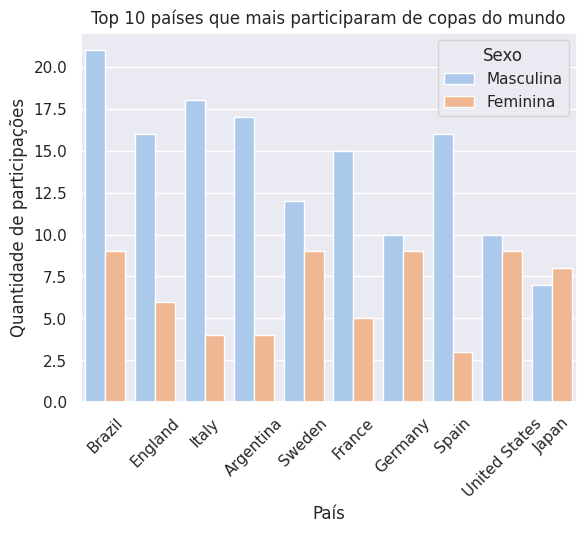

In [60]:
#### solução com seaborn

participacoes_long = top_10.reset_index().melt(id_vars=['time_1'], value_vars=['Masculina', 'Feminina'], var_name='Sexo', value_name='Quantidade')

sns.barplot(data=participacoes_long, x='time_1', y='Quantidade', hue='Sexo', palette='pastel')
plt.title('Top 10 países que mais participaram de copas do mundo')
plt.xlabel('País')
plt.ylabel('Quantidade de participações')
plt.xticks(rotation=45)
plt.show()

In [62]:
#### solução com plotly

fig = px.bar (top_10,  y=['Masculina','Feminina'], title='Top 10 países que mais participaram de copas do mundo', labels={'time_1': 'País', 'value': 'Quantidade de participações', 'variable': 'Gênero'},
              text_auto=True, height=600)

fig.update_layout(xaxis_title = 'País', yaxis_title ='Quantidade de participações')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

#### Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:
* Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
* Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de `gols_1` e `gols_2` para distinguir gols em casa e do time visitante.
* Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com `cartao_amarelo_1 + cartao_amarelo_2` e outra área com `cartao_vermelho_1 + cartao_vermelho_2`.
* Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando `gols_contra_1` e `gols_contra_2`.

Referências sobre gráfico de área
* Matplotlib: https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html#sphx-glr-gallery-lines-bars-and-markers-stackplot-demo-py
* Pandas + Matplotlib: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.area.html
* Seaborn: https://seaborn.pydata.org/generated/seaborn.objects.Area.html
* Plotly: https://plotly.com/python/filled-area-plots/

   gols_1_contra  gols_2_contra
0              1              1
1              1              1
2              1              1
3              1              1
4              1              1
ok
